### Survival Analysis: Implementation in Python

### Introduction

Survival Analysis is a branch of statistical modelling that is optimal for working with censored, time-to-event data. Which can be used to address questions such as ‘how long would it be, before a particular event occurs’. 


Such data-sets are common in medical studies. Given a **cohort of patients** and an **observation window**, we would observe the **event** (such as death, commencement/recovery of/from disease etc) for some of the patients, whereas other patients would be **censored**, either because the observation period ended or because they dropped out from the study prematurely.


 This analysis can be further applied to not just medical events, but to many different types of events of interest in different business domains. 

In [31]:
# libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter 
from lifelines.plotting import plot_lifetimes    
%matplotlib inline


### Description of the data
Age: Age 

anaemia: decrease of red blood cells or hemoglobulin (boolean)

creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)

diabetes: If the patient has diabetes (boolean)

ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure: If the patient has hypertension (boolean)

platelets: Platelets in the blood (kiloplatelets/mL)

serum_creatinine: Level of serum creatinine in the blood (mg/dL)

serum_sodium: Level of serum sodium in the blood (mEq/L)

sex: Woman or man (binary)

smoking: If the patient smokes or not (boolean)

time: Follow-up period (days)

DEATH_EVENT: If the patient deceased during the follow-up period (boolean)

In [32]:
# Create dataframe
data = pd.read_csv("E:\Coursera courses\IBM Machine Learning\Course 6 Time series\data\heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [34]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [35]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Seems like there is no missing values

### Change data types

In [36]:
# age column can be converted to integers 
data.age = data.age.astype("int64")
data.age.dtype
data.age.unique()

array([75, 55, 65, 50, 90, 60, 80, 62, 45, 49, 82, 87, 70, 48, 68, 53, 95,
       58, 94, 85, 69, 72, 51, 57, 42, 41, 67, 79, 59, 44, 63, 86, 66, 43,
       46, 61, 81, 52, 64, 40, 73, 77, 78, 54, 47, 56], dtype=int64)

In [37]:
# platelet column contain large values, converting the units to kiloplatelets/mL would make the value for compact
data.platelets = (data.platelets / 1000).astype("int64")
data.platelets.unique()

array([265, 263, 162, 210, 327, 204, 127, 454, 388, 368, 253, 136, 276,
       427,  47, 262, 166, 237,  87, 297, 289, 149, 196, 284, 153, 200,
       360, 319, 302, 188, 228, 226, 321, 305, 329, 185, 218, 194, 310,
       271, 451, 140, 395, 418, 351, 255, 461, 223, 216, 254, 390, 385,
       119, 213, 274, 244, 497, 374, 122, 243, 266, 317, 283, 324, 293,
       172, 406, 173, 304, 235, 181, 249, 219, 318, 221, 298, 286, 621,
       850, 306, 252, 328, 164, 507, 203, 217, 300, 267, 227, 250, 295,
       231, 211, 348, 229, 338, 242, 225, 184, 277, 362, 174, 448,  75,
       334, 192, 220,  70, 270, 325, 176, 189, 281, 337, 105, 132, 279,
       303, 224, 389, 365, 201, 275, 350, 309, 260, 160, 126, 259,  73,
       377, 212, 186, 268, 147, 481, 290, 358, 151, 371, 130, 504, 141,
        62, 330, 248, 257, 533, 264, 282, 314, 246, 301, 404, 236, 294,
       233, 308, 198, 208, 133, 222, 215, 150, 422,  25, 232, 241,  51,
       336, 543, 382, 179, 155, 742], dtype=int64)

In [38]:
data.time.unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

In [39]:
# time column currently indicate number of days between medical inspection for the patients. this can be scaled to weeks 
data.time = np.ceil(data.time / 7).astype("int64")
data.time.unique()
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265,1.9,130,1,0,1,1
1,55,0,7861,0,38,0,263,1.1,136,1,0,1,1
2,65,0,146,0,20,0,162,1.3,129,1,1,1,1
3,50,1,111,0,20,0,210,1.9,137,1,0,1,1
4,65,1,160,1,20,0,327,2.7,116,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155,1.1,143,1,1,39,0
295,55,0,1820,0,38,0,270,1.2,139,0,0,39,0
296,45,0,2060,1,60,0,742,0.8,138,0,0,40,0
297,45,0,2413,0,38,0,140,1.4,140,1,1,40,0


### Correlation Heatmap

Correlation to 'WAU' value:
DEATH_EVENT                 1.000000
time                       -0.526917
serum_creatinine            0.294278
ejection_fraction          -0.268603
age                         0.253581
serum_sodium               -0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                  -0.049188
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
Name: DEATH_EVENT, dtype: float64


Text(0.5, 1.0, 'Heart Failure Survival Heatmap')

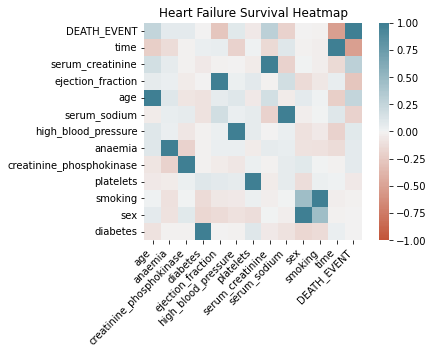

In [40]:
import seaborn as sns

corr = data.corr().sort_values(ascending=False, key=lambda x: abs(x), by="DEATH_EVENT")

print("Correlation to 'WAU' value:")
print (corr["DEATH_EVENT"])

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heart Failure Survival Heatmap")

The features "diabetes", "sex", and "smoking" have low correlation to the Death event, and therefore is dropped for the dataset.

### Modelling Approaches
In this notebook, I explore 2 models:

1. Kaplan-Meier Estimator
2. Cox Proportional Hazard Model

The Kaplan-Meier estimator is a test statistic that gives us an approximation of the true survival function of a population, the approximation getting better with increasing sample size. This estimator can robustly handle censoring, and can be derived from the Hazard Function using Maximum Likelihood Estimation.

This estimator can be used for simple comparison of survival rates between groups (For instance, survival rates between smokers and non-smokers).

The Cox Proportional Hazard Model is a survival analysis model that assumes that the baseline hazard function of a population is multiplicatively influenced by the covariates. For instance, given a group of smokers and non-smokers, the baseline hazard of the population is multiplied by 2 in case of smokers.

The Cox Proportional Hazard model can be used to model hazard rates based on multiple features, either categorical or numerical.

λ(t|x)=λ0(t)eb1x1+b2x2+...+bnxn 
In the above equation:

λ0(t)  is the baseline hazard function of the population. It varies with time, but is otherwise independent of the features.
Each feature (the x's) multiplicatively affect the baseline hazard function (multiplying by  ebkxk )
The term "proportional hazard" means that all feature effects are proportional throughout time. If a certain feature doubles the baseline hazard rate at time t = 2, then it also doubles the baseline hazard rate at time t = 3, t = 100 etc.

## Section 2: Plotting the Kaplan-Meier Curve

The Kaplan-Meier Curve represents a simple non-parametric visualization of survival likelihood function in our data. In that sense, it can be thought of as part of the EDA process for survival analysis. Let's start by fitting a simple Kaplan-Meier Curve on our data.


Text(0, 0.5, 'Survival probability')

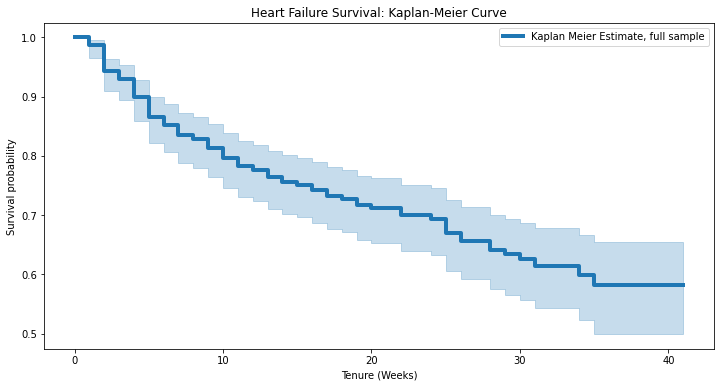

In [65]:
kmf = KaplanMeierFitter()

kmf.fit(data.time, data.DEATH_EVENT, label = 'Kaplan Meier Estimate, full sample')

kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Heart Failure Survival: Kaplan-Meier Curve')
plt.xlabel('Tenure (Weeks)')
plt.ylabel('Survival probability')

From the fitted object, we can also see the survival probabilities by accessing the survival_function_ attribute:


The Kaplan-Meier model provides a table of the cumulative survival probability by time. Such "life tables" are commonly used by life insurance companies in planning life insurance products.

In [43]:
kmf.survival_function_

,"Kaplan Meier Estimate, full sample"
timeline,
0.0,1.000000
1.0,0.986622
2.0,0.943144
3.0,0.929718
4.0,0.899401
5.0,0.865589
6.0,0.851904
7.0,0.834798
8.0,0.827955


# Section 3: Examining Variables
A Kaplan-Meier plot can also be used to analyze impact of categorical features on survival. For example, is there a decrease in survival for patients with anaemia vs patients without anaemia?

As we continue to examine the survival function, we may want to relate survival risk with features, or characteristics of our patients. In this example, we will look at diffences in survival risk for patients who have anemia, vs. patients who don't have anemia. We can start by plotting a simple histogram for each category.

DEATH_EVENT
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: time, dtype: object

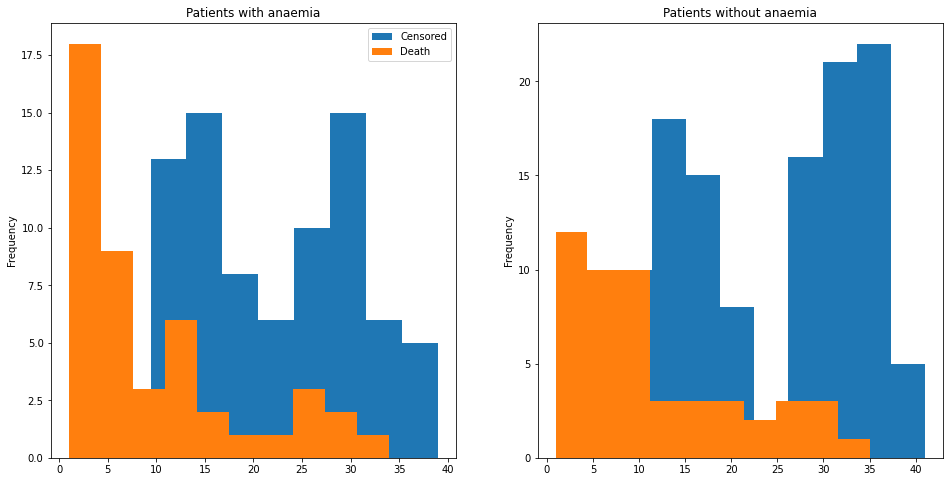

In [70]:
df1 = data[data.anaemia==1]
df2 = data[data.anaemia==0]
fig, ax = plt.subplots(1,2, figsize=(16,8))
df1.groupby('DEATH_EVENT')['time'].plot(kind='hist', ax=ax[0], title='Patients with anaemia')
ax[0].legend(labels=['Censored', 'Death'])
df2.groupby('DEATH_EVENT')['time'].plot(kind='hist', ax=ax[1], title='Patients without anaemia')

Text(0, 0.5, 'Survival probability')

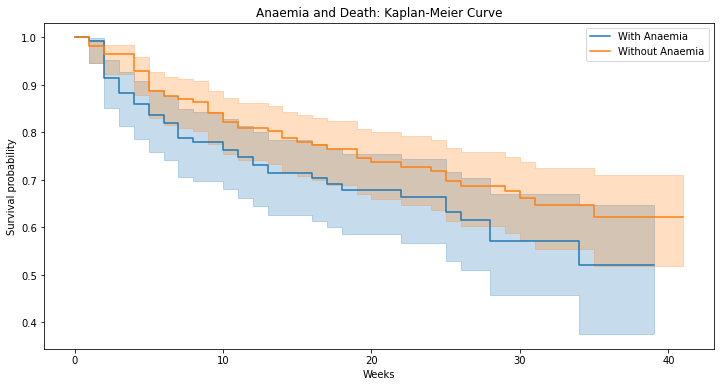

In [71]:
kmf.fit(df1.time, df1.DEATH_EVENT)
kmf.plot(label='With Anaemia', figsize=(12, 6))
kmf.fit(df2.time, df2.DEATH_EVENT)
kmf.plot(label='Without Anaemia')
plt.title('Anaemia and Death: Kaplan-Meier Curve')
plt.xlabel('Weeks')
plt.ylabel('Survival probability')

Are patients with high blood pressure at higher risk?

DEATH_EVENT
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: time, dtype: object

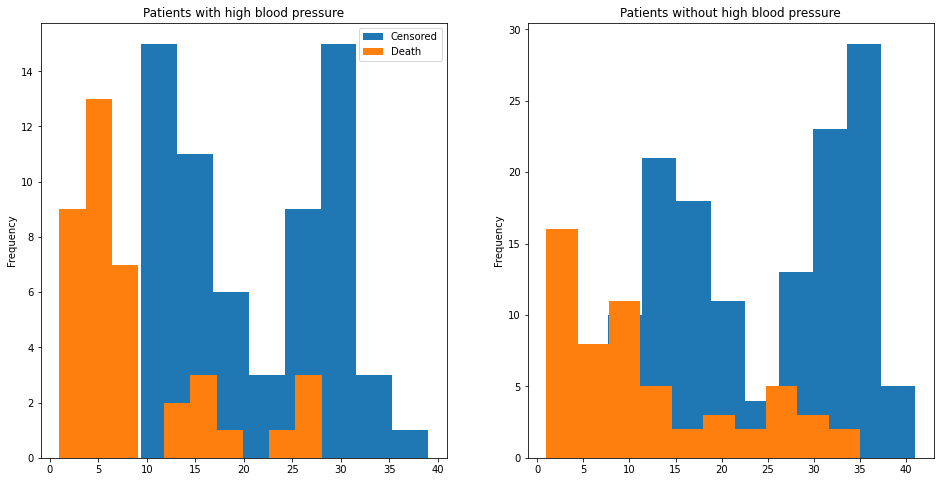

In [72]:
df1 = data[data.high_blood_pressure==1]
df2 = data[data.high_blood_pressure==0]
fig, ax = plt.subplots(1,2, figsize=(16,8))
df1.groupby('DEATH_EVENT')['time'].plot(kind='hist', ax=ax[0], title='Patients with high blood pressure')
ax[0].legend(labels=['Censored', 'Death'])
df2.groupby('DEATH_EVENT')['time'].plot(kind='hist', ax=ax[1], title='Patients without high blood pressure')

Text(0, 0.5, 'Survival probability')

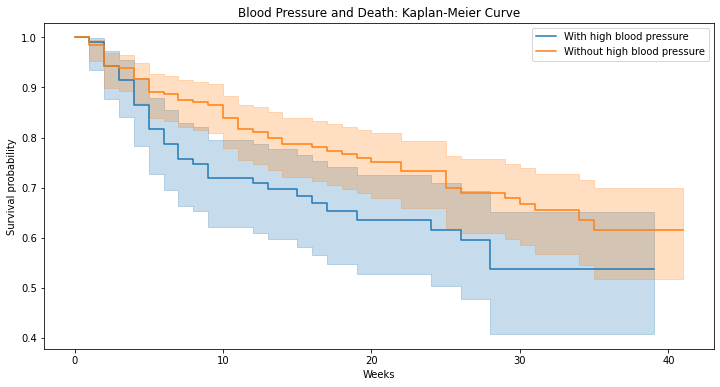

In [73]:
kmf.fit(df1.time, df1.DEATH_EVENT)
kmf.plot(label='With high blood pressure', figsize=(12, 6))
kmf.fit(df2.time, df2.DEATH_EVENT)
kmf.plot(label='Without high blood pressure')
plt.title('Blood Pressure and Death: Kaplan-Meier Curve')
plt.xlabel('Weeks')
plt.ylabel('Survival probability')

Unsurprisingly, the above plots shows us that patients with hypertension or anaemia have a increased risk of death. 
However, as demonstrated in the Kaplan Meier curves, hypertension and anaemia do carry increased risk of death but the confidence intervals are wide enough that these are not statistically significant.

Going back to the life insurance example, insurance companies can use such simple models to design business rules for life insurance products. For a smoker, their insurance premiums will be adjusted upwards to counteract the lowered survival probability.

### Section 4: Cox Proportional Hazards Model



Kaplan-Meier curves are useful only when the predictor variable is categorical (e.g.: treatment A vs treatment B; males vs females). They don’t work easily for quantitative predictors such as gene expression, weight, or age.

An alternative method is the Cox proportional hazards regression analysis, which works for both quantitative predictor variables and for categorical variables. Furthermore, the Cox regression model extends survival analysis methods to assess simultaneously the effect of several risk factors on survival time. 




In [51]:
# Using Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(data, duration_col='time', event_col='DEATH_EVENT')


<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>

### Risk factors
Lets plot the individual risk factors

<AxesSubplot:xlabel='log(HR) (95% CI)'>

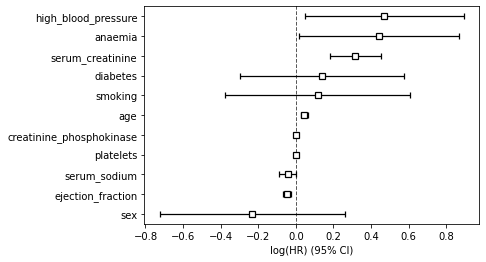

In [49]:
cph.plot()

Here, we can see the coefficient estimate, along with error bars used to assess statistical significance. We see that high blood pressure, anaemia, serum creatinine, age and ejection fraction are all within the 95% confidence interval of affecting HF death. 

Simply put, older patients with high blood pressure, anaemia, serum creatine are more likely to die of heart failure. Whereas, higher ejection fraction (Percentage of blood leaving the heart at each contraction) is associated with HF survival.

### Evaluation

The most common way to measure the performance of a Cox model is to use the Concordance index or C-index. The C-index for a survival model can be thought of as the weighted average of the area under time-specific Receiver Operating Characteristic (ROC) curves.

In [52]:
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"], decimals=3)                   

c:\Users\Boyang\venv1\lib\site-packages\lifelines\utils\printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
c:\Users\Boyang\venv1\lib\site-packages\lifelines\utils\printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  columns = summary_df.columns & self.columns
c:\Users\Boyang\venv1\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -469.797
         time fit was run = 2022-05-23 11:50:46 UTC

---
                           coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                          
age                       0.046      1.047                1.028                1.066  4.919 <0.0005
anaemia                   0.442      1.556                1.018                2.377  2.044   0.041
creatinine_phosphokinase  0.000      1.000                1.000                1.000  2.186   0.029
diabetes                  0.141      1.151                0.744                1.782  0.632   0.527
ejection_fraction        -0.049      0.952                0.933                0.972 -4.655 <0.0005
high_blood_pressure       0.471      1.601                1.048                2.445  2.177   0.029
platelets                -0.001      0.999                0.997                1.002 -0.470   0.638
serum_creatinine          0.317      1.373                1.198                1.574  4.552 <0.0005
serum_sodium             -0.043      0.958                0.916                1.003 -1.849   0.064
sex                      -0.233      0.792                0.484                1.297 -0.925   0.355
smoking                   0.115      1.122                0.686                1.836  0.459   0.647
---
Concordance = 0.741
Partial AIC = 961.593
log-likelihood ratio test = 80.878 on 11 df
-log2(p) of ll-ratio test = 39.866

In the above table, the key output is exp(coef). This is interpreted as the scaling of hazard risk for each additional unit of the variable, 1.00 being neutral. 

For example, the exp(coefficient) corresponding to high_blood_pressure predicts a individual with hypertension is 1.6 more times more likely to die from heart failure.

### Using a survival model

A survival model will allow us to estimate how likely a person is to survive or die over time. As an example, we will plot the expected survival function for individual #6 and #46 in the dataset

Text(0.5, 0, 'Time in weeks')

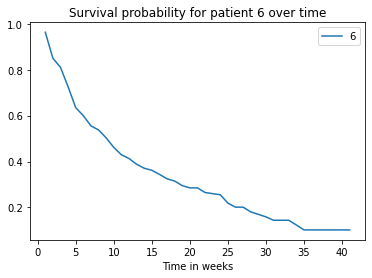

In [74]:
cph.predict_survival_function(data.loc[6]).plot(title="Survival probability for patient 6 over time")
plt.xlabel("Time in weeks")

Text(0.5, 0, 'Time in weeks')

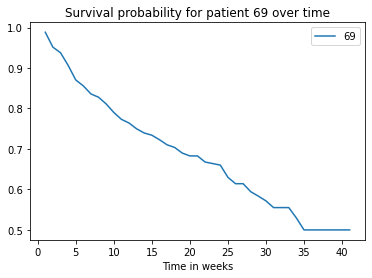

In [63]:
cph.predict_survival_function(data.loc[69]).plot(title="Survival probability for patient 69 over time")
plt.xlabel("Time in weeks")

Patient #6 has a poor outlook, whereas patient 69 has a good chance of surviving past 30 weeks.

### Conclusion

* The predictive power of the ejection fraction is shown very well through the use of the Kaplan Meier curves. A lower ejection fraction seems to have some correlation with increased death. This seems reasonable as typically a low stroke volume is associated with congestinve heart failure. 

* As expected, age also shows a strong correlation with survival, as made apparent through the Kaplan Meier curves.

* Those with high blood pressure have an increased risk of death. This is reasonable as hypertension is a major risk factor for heart failure.

* Anaemia is associated with increased risk of death. Again, this is reasonable as anaemia is a common comorbidity of heart failure.

* Elevated serum_creatinine appears to indicate increased death.


